<a href="https://colab.research.google.com/github/rncebranco/ufpa_ficcd_2025_2_ava/blob/main/FICCD_Claudomiro_ativ_2_2_Exp_values_Surp_Entr_Cross_entr%2C_Softmax_e_True_labels_RB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fundamentos de Inteligência Computacional e Ciência de Dados**

**Professor: Claudomiro Sales**

**Aluna: Raimunda Branco - 202499980055**

**[Atividade 2.2 - Expected values, Surprise, Entropy, Cross-entropy loss, Softmax e True labels (one-hot encoded)](https://docs.google.com/presentation/d/1EZmtEhOGZqFeXaRmPdBIi6_DIjgNUUt5g9CIqoP9FmQ/edit?slide=id.g35c9f057288_0_214#slide=id.g35c9f057288_0_214)**

**Belém, 02 de junho de 2025.**

#####**A)** Surpresa

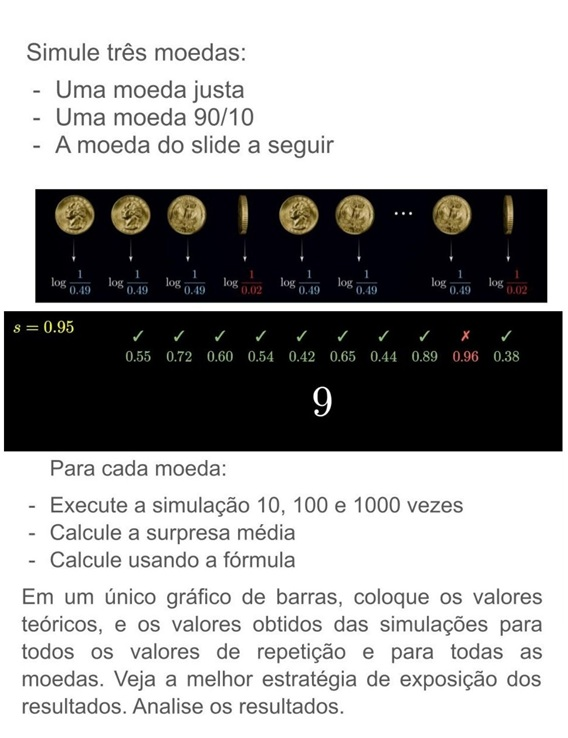

In [77]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [78]:
# Simulações para uma moeda justa

np.random.seed(42)

def simulacao_moeda_justa(n):
  resultados = [np.random.choice(['head', 'tail']) for _ in range(n)]

  heads = resultados.count('head')
  tails = resultados.count('tail')

  # Probabilidades
  p_heads = heads / n
  p_tails = tails / n

  # - Calcule a surpresa média (entropia estimada, mais perto de 0, menor surpresa)
  diferenca_probabilidades = abs(p_heads - p_tails)
  entropia_estimada = 1 - diferenca_probabilidades

  # - Calcule usando a fórmula
  entropia = 0
  if p_heads > 0:
    entropia = entropia - (p_tails * math.log2(p_tails))
  if p_tails > 0:
    entropia = entropia - (p_heads * math.log2(p_heads))

  print(f"\nSimulação {n} lançamentos:")
  print(f"- Heads: {heads}")
  print(f"- Tails: {tails}")
  print(f"- Probabilidade Heads: {p_heads:.2%}")
  print(f"- Probabilidade Tails: {p_tails:.2%}")
  print(f"- Entropia estimada: {entropia_estimada:.4}")
  print(f"- Entropia fórmula: {entropia:.4}")

# - Execute a simulaçao 10, 100 e 1000 vezes
print(f"Simulações para uma moeda justa:")
simulacao_moeda_justa(10)
simulacao_moeda_justa(100)
simulacao_moeda_justa(1000)

Simulações para uma moeda justa:

Simulação 10 lançamentos:
- Heads: 7
- Tails: 3
- Probabilidade Heads: 70.00%
- Probabilidade Tails: 30.00%
- Entropia estimada: 0.6
- Entropia fórmula: 0.8813

Simulação 100 lançamentos:
- Heads: 39
- Tails: 61
- Probabilidade Heads: 39.00%
- Probabilidade Tails: 61.00%
- Entropia estimada: 0.78
- Entropia fórmula: 0.9648

Simulação 1000 lançamentos:
- Heads: 508
- Tails: 492
- Probabilidade Heads: 50.80%
- Probabilidade Tails: 49.20%
- Entropia estimada: 0.984
- Entropia fórmula: 0.9998


In [79]:
# Simulação para uma moeda 90/10

np.random.seed(42)

def simulacao_moeda_viciada(n):

  # Pesos: 90% para head e 10% para  tail
  resultados = [np.random.choice(['head', 'tail'], p=[0.9, 0.1]) for _ in range(n)]

  heads = resultados.count('head')
  tails = resultados.count('tail')

  # Probabilidades
  p_heads = heads / n
  p_tails = tails / n

  # - Calcule a surpresa média (entropia estimada, mais perto de 0, menor surpresa)
  diferenca_probabilidades = abs(p_heads - p_tails)
  entropia_estimada = 1 - diferenca_probabilidades

  # - Calcule usando a fórmula
  entropia = 0
  if p_heads > 0:
    entropia = entropia - (p_tails * math.log2(p_tails))
  if p_tails > 0:
    entropia = entropia - (p_heads * math.log2(p_heads))

  print(f"\nSimulação {n} lançamentos:")
  print(f"- Heads: {heads}")
  print(f"- Tails: {tails}")
  print(f"- Probabilidade Heads: {p_heads:.2%}")
  print(f"- Probabilidade Tails: {p_tails:.2%}")
  print(f"- Entropia estimada: {entropia_estimada:.4}")
  print(f"- Entropia fórmula: {entropia:.4}")

# - Execute a simulaçao 10, 100 e 1000 vezes
print(f"Simulações para uma moeda viciada:")
simulacao_moeda_viciada(10)
simulacao_moeda_viciada(100)
simulacao_moeda_viciada(1000)

Simulações para uma moeda viciada:

Simulação 10 lançamentos:
- Heads: 9
- Tails: 1
- Probabilidade Heads: 90.00%
- Probabilidade Tails: 10.00%
- Entropia estimada: 0.2
- Entropia fórmula: 0.469

Simulação 100 lançamentos:
- Heads: 91
- Tails: 9
- Probabilidade Heads: 91.00%
- Probabilidade Tails: 9.00%
- Entropia estimada: 0.18
- Entropia fórmula: 0.4365

Simulação 1000 lançamentos:
- Heads: 892
- Tails: 108
- Probabilidade Heads: 89.20%
- Probabilidade Tails: 10.80%
- Entropia estimada: 0.216
- Entropia fórmula: 0.4939


In [81]:
# Simulação para a moeda mostrada no slide (prob moeda também poder cair em pé)

np.random.seed(42)

def simulacao_moeda_complexa(n):

  # Pesos: 49% para head, 49% para  tail e 2% para cair em pé
  resultados = [np.random.choice(['head', 'tail', 'em_pe'],
                                  p=[0.49, 0.49, 0.02]) for _ in range(n)]

  heads = resultados.count('head')
  tails = resultados.count('tail')
  em_pe = resultados.count('em_pe')

  # Probabilidades
  p_heads = heads / n
  p_tails = tails / n
  p_em_pe = em_pe / n

  # - Calcule a surpresa média (entropia estimada, mais perto de 0, menor surpresa)
  diferencas_probabilidades = [
    abs(p_heads - p_tails),
    abs(p_heads - p_em_pe),
    abs(p_tails - p_em_pe)
]
  entropia_estimada = 1 - max(diferencas_probabilidades)

  # - Calcule usando a fórmula
  entropia = 0
  for p in [p_heads, p_tails, p_em_pe]:
    if p > 0:
      entropia = entropia - (p * math.log2(p))

  print(f"\nSimulação {n} lançamentos:")
  print(f"- Heads: {heads}")
  print(f"- Tails: {tails}")
  print(f"- Em pé: {em_pe}")
  print(f"- Probabilidade Heads: {p_heads:.2%}")
  print(f"- Probabilidade Tails: {p_tails:.2%}")
  print(f"- Probabilidade em pé: {p_em_pe:.2%}")
  print(f"- Entropia estimada: {entropia_estimada:.4f}")
  print(f"- Entropia fórmula: {entropia:.4f}")
  print(f"- Entropia máxima para 3 eventos: {math.log2(3):.4f}")

# - Execute a simulaçao 10, 100 e 1000 vezes
print(f"Simulações para uma moeda complexa:")
simulacao_moeda_complexa(10)
simulacao_moeda_complexa(100)
simulacao_moeda_complexa(1000)

Simulações para uma moeda complexa:

Simulação 10 lançamentos:
- Heads: 4
- Tails: 6
- Em pé: 0
- Probabilidade Heads: 40.00%
- Probabilidade Tails: 60.00%
- Probabilidade em pé: 0.00%
- Entropia estimada: 0.4000
- Entropia fórmula: 0.9710
- Entropia máxima para 3 eventos: 1.5850

Simulação 100 lançamentos:
- Heads: 53
- Tails: 46
- Em pé: 1
- Probabilidade Heads: 53.00%
- Probabilidade Tails: 46.00%
- Probabilidade em pé: 1.00%
- Entropia estimada: 0.4800
- Entropia fórmula: 1.0672
- Entropia máxima para 3 eventos: 1.5850

Simulação 1000 lançamentos:
- Heads: 484
- Tails: 493
- Em pé: 23
- Probabilidade Heads: 48.40%
- Probabilidade Tails: 49.30%
- Probabilidade em pé: 2.30%
- Entropia estimada: 0.5300
- Entropia fórmula: 1.1349
- Entropia máxima para 3 eventos: 1.5850


In [82]:
# Simulação para a moeda mostrada no slide e com os valores definidos

valores_probabilidade = [0.55, 0.72, 0.60, 0.54, 0.42, 0.65, 0.44, 0.89, 0.96, 0.38]

def simulacao_moeda_slide(valores_probabilidade, s=0.95):
  resultados = []

  for val in valores_probabilidade:
    if val >= s:
      resultados.append('em_pe')
    elif val >= 0.5:
      resultados.append('tail')
    else:
      resultados.append('head')

  n = len(valores_probabilidade)
  heads = resultados.count('head')
  tails = resultados.count('tail')
  em_pe = resultados.count('em_pe')

  # Probabilidades
  p_heads = heads / n
  p_tails = tails / n
  p_em_pe = em_pe / n

  # - Calcule a surpresa média (entropia estimada, mais perto de 0, menor surpresa)
  diferencas_probabilidades = [
    abs(p_heads - p_tails),
    abs(p_heads - p_em_pe),
    abs(p_tails - p_em_pe)
  ]
  entropia_estimada = 1 - max(diferencas_probabilidades)

  # - Calcule usando a fórmula
  entropia = 0
  for p in [p_heads, p_tails, p_em_pe]:
    if p > 0:
      entropia -= p * math.log2(p)

  print("Simulação com valores fixos:")
  print(f"- Valores: {valores_probabilidade}")
  print(f"- Resultados: {resultados}")
  print(f"- Heads: {heads}")
  print(f"- Tails: {tails}")
  print(f"- Em pé: {em_pe}")
  print(f"- Probabilidades: Head = {p_heads:.2%}; Tail = {p_tails:.2%}; Em pé = {p_em_pe:.2%}")
  print(f"- Entropia estimada: {entropia_estimada:.4f}")
  print(f"- Entropia (fórmula): {entropia:.4f}")
  print(f"- Entropia máxima possível (3 eventos): {math.log2(3):.4f}")

# Simulação para os valores fixos
simulacao_moeda_slide(valores_probabilidade)

Simulação com valores fixos:
- Valores: [0.55, 0.72, 0.6, 0.54, 0.42, 0.65, 0.44, 0.89, 0.96, 0.38]
- Resultados: ['tail', 'tail', 'tail', 'tail', 'head', 'tail', 'head', 'tail', 'em_pe', 'head']
- Heads: 3
- Tails: 6
- Em pé: 1
- Probabilidades: Head = 30.00%; Tail = 60.00%; Em pé = 10.00%
- Entropia estimada: 0.5000
- Entropia (fórmula): 1.2955
- Entropia máxima possível (3 eventos): 1.5850


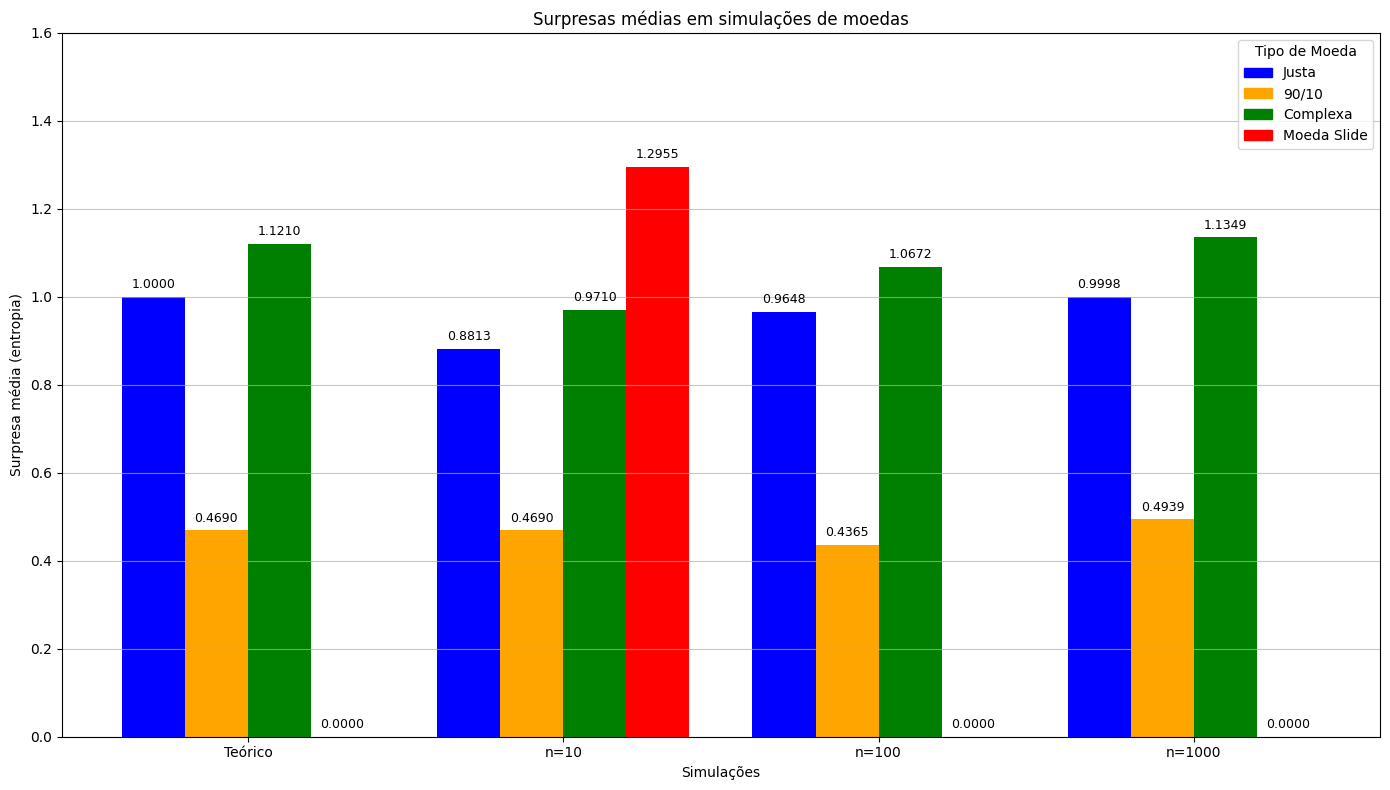

In [83]:
# Em um único gráfico de barras mostre os valores para todas as simulações

moedas = ['Justa', '90/10', 'Complexa', 'Moeda Slide']
categorias = ['Teórico', 'n=10', 'n=100', 'n=1000']

dados = {
  'Justa': [1.0000, 0.8813, 0.9648, 0.9998],
  '90/10': [0.4690, 0.4690, 0.4365, 0.4939],
  'Complexa': [1.1210, 0.9710, 1.0672, 1.1349],
  'Moeda Slide': [0, 1.2955, 0, 0]
}

# Configuração do gráfico
fig, ax = plt.subplots(figsize = (14, 8))
bar_width = 0.2
index = np.arange(len(categorias))

colors = ['blue', 'orange', 'green', 'red']

# Barras da legenda
legend_handles = []

# Barras
for i, moeda in enumerate(moedas):
  # Cria a barra para cada categoria
  for j, cat in enumerate(categorias):
    valor = dados[moeda][j]
    if not np.isnan(valor):
      bar = ax.bar(j + i * bar_width, valor, bar_width,
        color=colors[i])

  # Legenda
  legend_handles.append(plt.Rectangle((0,0), 1, 1, color=colors[i], label=moeda))

# Parâmetros do gráfico
ax.set_xlabel('Simulações')
ax.set_ylabel('Surpresa média (entropia)')
ax.set_title('Surpresas médias em simulações de moedas')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(categorias)
ax.legend(handles = legend_handles, title='Tipo de Moeda')
ax.grid(axis = 'y', alpha=0.7)
ax.set_ylim(0, 1.6)

# Valores barras
for i, moeda in enumerate(moedas):
  for j, valor in enumerate(dados[moeda]):
    if not np.isnan(valor):
      ax.text(j + i * bar_width, valor + 0.02, f'{valor:.4f}',
        ha='center', fontsize=9)

plt.tight_layout()
plt.show()

**Análise dos Resultados:**

* Moeda justa:
  * entropia teórica = 1, valor máximo para duas situações equilibradas, significando máxima incerteza.
  * 10 lançamentos: entropia = 0,8813, situação com mais variação, entropia menor
  * 100 lançamentos: entropia = 0,9648, variação diminuindo, entropia aumentando
  * 1000 lançamentos: entropia = 0,9998, entropia convergindo para o valor teórico

* Moeda 90/10:
  * entropia teórica e com 10 lançamentos = 0,4690, bem menor que para a moeda justa. Há menos incerteza, pois tem bem mais chance de sair cara.
  * 100 e 1000 lançamentos = entropias próximas de 0,4690.
  * Quanto maior o número de simulações, mais os resultados mostram que a moeda é viciada.

* Moeda complexa (podendo cair em pé também):
  * entropia teórica = 1,121. A chance de ter um terceiro resultado aumenta a entropia, passando de 1 já que há mais de 2 probabilidades de ocorrer um determinado evento. Mas ainda está abaixo do valor máximo para 3 eventos que é 1,5850 (mostra assimetria das probabilidades).
  * entropia p/ 10 lançamentos = 0,9710. Entropia menor que a teórica, pois não houve a categoria em pé
  * entropia p/ 100 lançamentos = 1,0672
  * entropia p/ 1000 lançamentos = 1,1349
  * Observando as entropias acima, percebe-se também uma convergência para a entropia teórica conforme o número de simulações aumenta.

* Moeda do slide (valores fixos):
  * entropia próxima do valor máximo para 3 eventos que é 1,5850, o que significa de forma confiável a incerteza de que, por exemplo, há maior surpresa quando ocorre os 10% de chance da moeda cair em pé.
  * Diferente da moeda complexa, a moeda do slide usa uma amostragem fixa de probabilidades. Logo não existe variabilidade, gerando uma entropia estimada estável.

* De uma forma geral, a entropia estimada mostra que:
  * Próximo de 1: alta surpresa, eventos com distribuição equilibrada, sendo difícil prever um resultado;
  * Próximo de 0: baixa surpresa, um evento ocorre com mais frequência, o que torna os resultados mais previsíveis;
  * Quando é > 0,5 e < 0,9: Há desequilíbrio, mas também há uma significativa incerteza.
  * A entropia estimada pode ser útil para avaliar se as amostras observadas são justas ou possuem vício, mesmo sem conhecer as probabilidades reais. Mas é uma simplificação bastante rasa e não é satisfatória para simulações com mais de 2 eventos.